# Simple Linear Regression

Below mentioned are the steps to be followed:
1. Load the data
2. Data Preparation - train-test Split, Normalisation or Rescaling
3. Training the Model
4. Prediction
5. Evaluation

## 1. Load the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

## 2. Data Preparation

In [5]:
from sklearn.preprocessing import StandardScaler
num_features = ['Hours', 'Scores']
standardized_data = StandardScaler().fit_transform(df)
print(standardized_data.shape)

(25, 2)


In [7]:
df = pd.DataFrame(standardized_data, columns = num_features)
df.head()

,Hours,Scores
0,-1.015328,-1.230223
1,0.035569,-0.180820
2,-0.732394,-0.988053
3,1.409819,0.949306
4,-0.611137,-0.866968


In [8]:
target = df['Scores']
data = df[['Hours']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, \
                                                    random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


## 3. Training the model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  -0.0019732162822435617
slope:  [0.97746517]


## 4. Prediction

In [13]:
y_test_pred = regressor.predict(X_test)

In [14]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,-1.270585,-1.389504
2,-0.988053,-0.717863
19,0.707136,0.941484
16,-0.866968,-0.994421
11,0.424605,0.348860
22,-0.665160,-0.480814
17,-1.109138,-1.231471
24,1.393284,1.099518


## 5. Evaluation

In [15]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.17838754769261278
Mean Squared Error:  0.03741160247184391
Root Mean Squared Error:  0.19342079120881475


# Let's do it like a Piro!!

Below mentioned are the steps to be followed:
1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

### 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_scores.csv')

### 2. Understanding and Visuallizing the data

In [3]:
df.shape

(25, 2)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

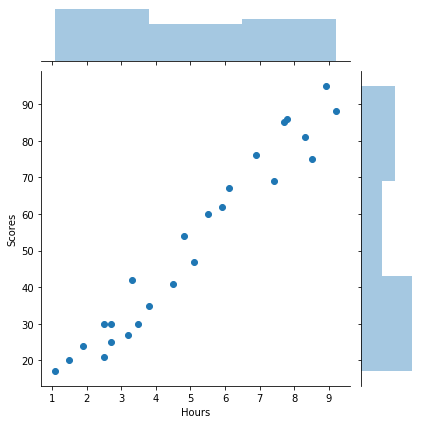

In [7]:
sns.jointplot(x='Hours', y='Scores', data=df, kind = 'scatter')

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


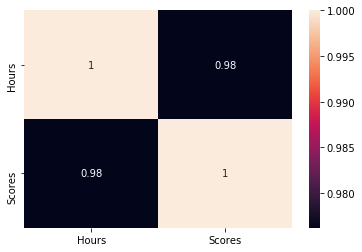

In [9]:
plt.figure()
sns.heatmap(df.corr(), annot = True)

### 3. Data Preparation
1. Splitting df into train and test
2. Rescaling the variables (Normalisation and Standardisation)
    - Interpretability improves
    - Model trains fast

In [10]:
# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(17, 2)
(8, 2)


In [11]:
df_train.head()

,Hours,Scores
23,6.9,76
14,1.1,17
1,5.1,47
10,7.7,85
13,3.3,42


In [12]:
from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['Hours', 'Scores']

norm_train_data = rescale.fit_transform(df_train.loc[:,num_features])

print(norm_train_data.shape, type(norm_train_data))

(17, 2) <class 'numpy.ndarray'>


In [13]:
df_train = pd.DataFrame(norm_train_data, columns = num_features)

df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [14]:
df_train.describe()

,Hours,Scores
count,17.000000,17.000000
mean,0.527233,0.486425
std,0.313990,0.327722
min,0.000000,0.000000
25%,0.271605,0.166667
50%,0.493827,0.474359
75%,0.814815,0.756410
max,1.000000,1.000000


### 4. Training

In [15]:
df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [16]:
y_train = df_train.pop('Scores')
X_train = df_train

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('y intercept: ',regressor.intercept_)

y intercept:  -0.04950975977223304


In [19]:
print('slope: ',regressor.coef_)

slope:  [1.016505]


### 5. Residual Analysis on Training Data

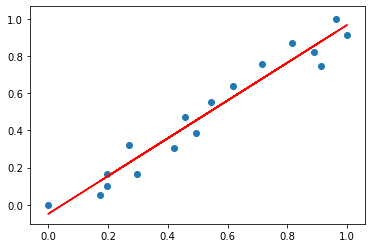

In [20]:
plt.scatter(X_train, y_train)

plt.plot(X_train, -0.04950975977223304 + 1.016505 * X_train, 'r')

plt.show()

In [21]:
y_train_pred = regressor.predict(X_train)

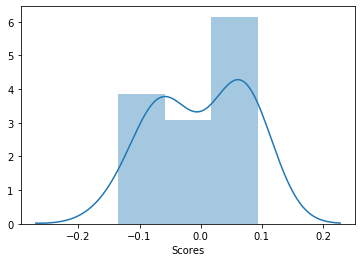

In [22]:
residual = y_train - y_train_pred

sns.distplot(residual)

### 6. Making the Prediction

In [23]:
num_features = ['Hours', 'Scores']

norm_test_data = rescale.transform(df_test.loc[:,num_features])

print(norm_test_data.shape, type(norm_test_data))

(8, 2) <class 'numpy.ndarray'>


In [24]:
df_test = pd.DataFrame(norm_test_data, columns = num_features)

df_test.head()

,Hours,Scores
0,0.049383,0.038462
1,0.259259,0.128205
2,0.777778,0.666667
3,0.172840,0.166667
4,0.592593,0.576923


In [25]:
y_test = df_test.pop('Scores')
X_test = df_test

In [26]:
y_test_pred = regressor.predict(X_test)

In [27]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
0,0.038462,0.000688
1,0.128205,0.214029
2,0.666667,0.741105
3,0.166667,0.126182
4,0.576923,0.552864
5,0.230769,0.289325
6,0.089744,0.050886
7,0.884615,0.791303


### 7. Evaluating the Algorithm

In [28]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.05666317702599552
Mean Squared Error:  0.00377467081076601
Root Mean Squared Error:  0.06143834967482452


In [29]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435258
